In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
# Loading the dataset (CSV file) into a Pandas DataFrame
data = pd.read_csv('data/train.csv')

In [3]:
# Converting the DataFrame to a NumPy array
data = np.array(data)

# Printing the shape of the dataset
# m = number of samples and n = number of features (including the labels)
m, n = data.shape

# Shuffling data before splitting into dev and training sets
np.random.shuffle(data)

In [4]:
# Splitting the dataset - First 1000 samples for dev set (validation)

# Transposing to make rows = features and columns = samples
data_dev = data[0:1000].T

# Extracting the labels
y_dev = data_dev[0]

# Extracting features (pixels)
x_dev = data_dev[1:n]

# Normalizing the pixel values to range [0, 1   ]
x_dev = x_dev / 255.

In [26]:
# The remaining samples for training the model
data_train = data[1000:m].T

# Extracting the labels for training set
y_train = data_train[0]

# Extracting the features for training set
x_train = data_train[1:n]

# Normalizing the pixel values
x_train = x_train / 255.

# checking the number of training samples
_, m_train = x_train.shape

In [6]:
print(y_train)

[  8   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0  53 189 221 254 208  47   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0  24 196 254 221 245 233 247 145  30   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0 154 253 204  22 122 184
 229 254 186   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0  29 241 207  20   0   0  20  52 247 19

In [27]:
# Initializing weights and biases randomly
def init_params():
    # Weights for first layer (10 neurons, 784 input pixels)
    w1 = np.random.rand(10, 784) - 0.5
    # Biases for first layer
    b1 = np.random.rand(10, 1) - 0.5
    # Weights for second layer (10 output classes)
    w2 = np.random.rand(10, 10) - 0.5
    # Biases for second layer
    b2 = np.random.rand(10, 1) - 0.5

    return w1, b1, w2, b2

In [8]:
# Activation function: ReLU (Rectified Linear Unit)
def ReLU(Z):
    return np.maximum(Z, 0)

In [9]:
# Activation function: Softmax (for multi-class classification)
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [10]:
# Forward propagation: Computing activations of the layers
def forward_prop(w1, b1, w2, b2, X):
    # Computing first hidden ayer's weighted input
    z1 = w1.dot(X) + b1
    # Applying ReLU activation
    a1 = ReLU(z1)
    # Computing output layer's weighted input
    z2 = w2.dot(a1) + b2
    # Applying softmax activation for output probabilities
    a2 = softmax(z2)

    return z1, a1, z2, a2

In [11]:
# Derivative of ReLU function (to be used in backpropagation)
def ReLU_deriv(Z):
    return Z > 0

In [31]:
# One-hot encoding for labels (needed for softmax output)
def one_hot(Y):
    # Creating zero matric with shape (num_samples, num_classes)
    one_hot_y = np.zeros((Y.size, Y.max() + 1))
    # Setting the correct class to 1
    one_hot_y[np.arange(Y.size), Y] = 1
    # Transposing to match the output shape
    one_hot_y = one_hot_y.T

    return one_hot_y

In [29]:
# Backward propagation: Computing gradients to update params
def backward_prop(z1, a1, z2, a2, w1, w2, X, Y):
    # Converting labels to one-hot encoding
    one_hot_y = one_hot(Y)
    # Computing output layer error
    dz2 = a2 - one_hot_y
    # Computing gradient for w2
    dw2 = 1 / m * dz2.dot(a1.T)
    # Computing graident for b2
    db2 = 1/ m * np.sum(dz2)
    # Computing hidden layer error
    dz1 = w2.T.dot(dz2) * ReLU_deriv(z1)
    # Computing gradient for w1
    dw1 = 1 / m * dz1.dot(X.T)
    # Computing gradient for b1
    db1 = 1 / m * np.sum(dz1)
    
    return dw1, db1, dw2, db2

In [15]:
# Updating params using gradient descent
def update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha):
    w1 -= alpha * dw1
    b1 -= alpha * db1
    w2 -= alpha * dw2
    b2 -= alpha * db2

    return w1, b1, w2, b2

In [16]:
# Getting predicted class labels from softmax output
def get_predictions(A2):
    # This returns index of highest probability class
    return np.argmax(A2, 0)

In [17]:
# Function to compute accuracy of predictions
def get_accuracy(predictions, Y):
    print(predictions, Y)
    # computing accuracy percentage
    return np.sum(predictions == Y) / Y.size

In [18]:
# Gradient descent optimization function
def gradient_descent(X, Y, alpha, iterations):
    # Initializing the params
    w1, b1, w2, b2 = init_params()
    for i in range(iterations):
        # Forward pass
        z1, a1, z2, a2 = forward_prop(w1, b1, w2, b2, X)
        # Backward pass
        dw1, db1, dw2, db2 = backward_prop(z1, a1, z2, a2, w1, w2, X, Y)
        # Weight update
        w1, b1, w2, b2 = update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha)
        # Printing progress every 10 iterations
        print(f'Iteration: {i}')
        predictions = get_predictions(a2)
        print(get_accuracy(predictions, Y))
        
    return w1, b1, w2, b2

In [32]:
# Training the model with learning rate 0.0001 and 1000 iterations
w1, b1, w2, b2 = gradient_descent(x_train, y_train, 0.0001, 1000)

Iteration: 0
[9 1 1 ... 9 1 1] [8 8 7 ... 5 2 7]
0.08973170731707317
Iteration: 1
[9 1 1 ... 9 1 1] [8 8 7 ... 5 2 7]
0.08973170731707317
Iteration: 2
[9 1 1 ... 9 1 1] [8 8 7 ... 5 2 7]
0.08985365853658536
Iteration: 3
[9 1 1 ... 9 1 1] [8 8 7 ... 5 2 7]
0.0898780487804878
Iteration: 4
[9 1 1 ... 9 1 1] [8 8 7 ... 5 2 7]
0.08992682926829268
Iteration: 5
[9 1 1 ... 9 1 1] [8 8 7 ... 5 2 7]
0.08995121951219512
Iteration: 6
[9 1 1 ... 9 1 1] [8 8 7 ... 5 2 7]
0.08995121951219512
Iteration: 7
[9 1 1 ... 9 1 1] [8 8 7 ... 5 2 7]
0.08985365853658536
Iteration: 8
[9 1 1 ... 9 1 1] [8 8 7 ... 5 2 7]
0.08980487804878048
Iteration: 9
[9 1 1 ... 9 1 1] [8 8 7 ... 5 2 7]
0.0897560975609756
Iteration: 10
[9 1 1 ... 9 1 1] [8 8 7 ... 5 2 7]
0.0897560975609756
Iteration: 11
[9 1 1 ... 9 1 1] [8 8 7 ... 5 2 7]
0.08978048780487805
Iteration: 12
[9 1 1 ... 9 1 1] [8 8 7 ... 5 2 7]
0.08980487804878048
Iteration: 13
[9 1 1 ... 9 1 1] [8 8 7 ... 5 2 7]
0.0897560975609756
Iteration: 14
[9 1 1 ... 9 1 1] [8

In [34]:
# Function to make predictions on a given dataset
def make_predictions(X, w1, b1, w2, b2):
    # Forward pass to get output activations
    _, _, _, a2 = forward_prop(w1, b1, w2, b2, X)
    # Getting the predicted class labels from the softmax output
    predictions = get_predictions(a2)
    return predictions

In [35]:
## Function to test model's prediction on a single sample
def test_prediction(index, w1, b1, w2, b2):
    # Extracting single image from the training set
    current_image = x_train[:, index, None]
    # Getting the model's prediction for the selected image
    prediction = make_predictions(x_train[:, index, None], w1, b1, w2, b2)
    # Getting the actual label for comparison
    label = y_train[index]

    # Printing the predicted and actual labels
    print(f'Prediction: {prediction}')
    print(f'Label: {label}')

    # Reshaping the image from a flat vector to a 28 x 28 grayscale image
    current_image = current_image.reshape((28, 28)) * 255
    # Setting the image to grayscale for better visualization
    plt.gray()
    # Displaying the image using Matplotlib
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction: [9]
Label: 8


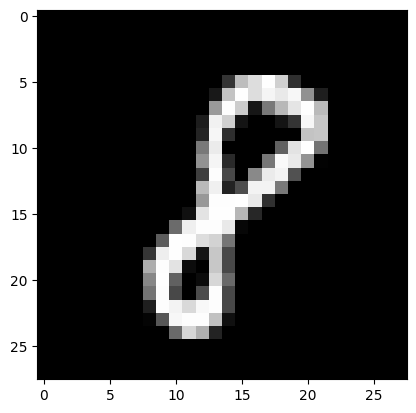

None


In [38]:
print(test_prediction(0, w1, b1, w2, b2))

Prediction: [1]
Label: 8


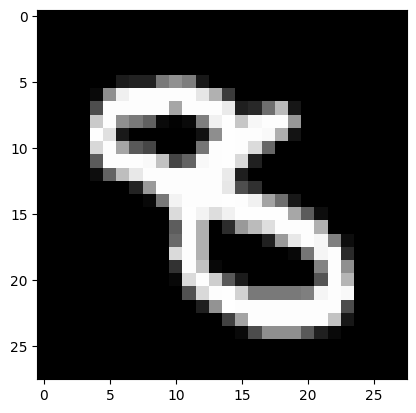

None


In [39]:
print(test_prediction(1, w1, b1, w2, b2))

Prediction: [9]
Label: 7


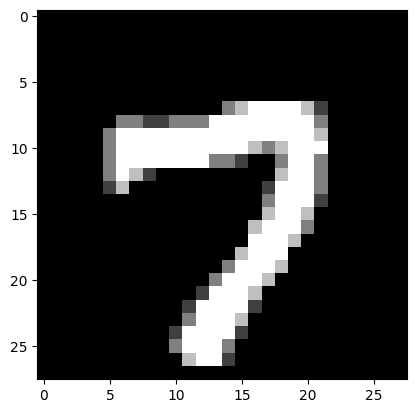

None


In [40]:
print(test_prediction(2, w1, b1, w2, b2))

Prediction: [9]
Label: 8


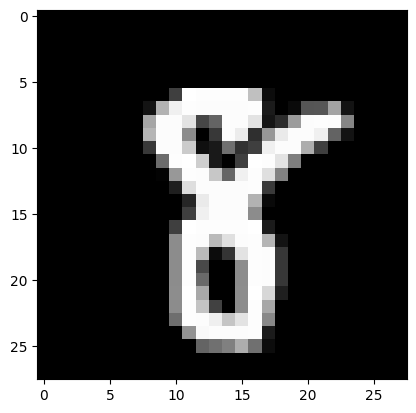

None


In [41]:
print(test_prediction(3, w1, b1, w2, b2))

Prediction: [9]
Label: 8


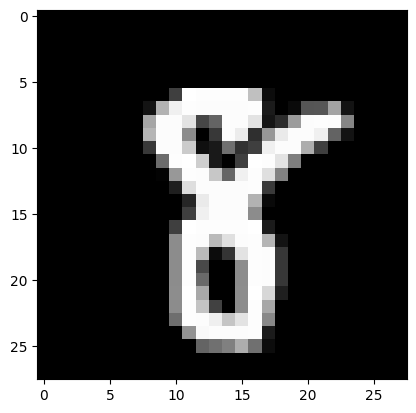

None


In [42]:
print(test_prediction(3, w1, b1, w2, b2))

In [43]:
# Making predictions on the dev set
dev_pred = make_predictions(x_dev, w1, b1, w2, b2)
print(get_accuracy(dev_pred, y_dev))

[2 1 3 1 9 8 1 1 8 1 9 1 1 9 1 1 6 1 9 9 9 1 9 1 1 9 1 9 9 1 9 1 9 9 1 9 1
 1 1 9 9 9 6 9 6 6 1 1 9 9 1 1 9 1 2 1 1 1 9 1 9 9 9 1 1 1 6 6 9 9 9 9 1 6
 1 1 1 8 1 1 9 2 1 1 1 9 9 9 1 1 1 9 1 8 1 1 1 1 1 9 1 1 9 1 1 9 1 3 1 1 1
 9 9 1 6 1 7 6 9 1 1 9 1 1 1 9 1 1 9 1 1 9 9 1 1 9 6 1 3 1 9 1 1 1 9 1 9 8
 7 9 9 1 1 1 1 9 1 1 1 1 9 1 9 6 9 9 9 9 9 9 6 9 1 1 9 9 9 1 1 9 1 1 8 1 1
 9 9 1 6 1 1 6 1 1 1 8 1 1 9 9 1 9 1 9 9 1 1 1 6 1 6 1 1 1 9 1 1 7 9 1 9 1
 1 9 1 1 1 9 9 6 1 1 9 9 1 1 1 9 9 9 9 1 9 9 1 6 6 9 9 1 9 1 9 1 9 1 9 1 1
 8 9 9 9 6 1 1 1 1 6 1 1 5 9 1 1 1 1 9 1 2 1 6 1 9 1 1 1 1 1 1 1 9 3 9 1 6
 9 1 5 1 9 9 9 9 9 1 2 1 6 6 1 8 8 9 1 1 9 9 1 1 1 1 1 8 1 6 1 9 1 1 1 6 1
 9 1 1 1 1 1 9 8 2 1 9 1 6 6 9 9 6 1 1 1 6 9 9 1 6 9 1 9 9 9 6 9 9 1 1 1 1
 3 1 9 1 9 1 8 1 1 9 1 9 1 1 1 1 8 9 9 9 9 9 1 1 1 1 9 1 1 1 9 9 1 1 1 6 1
 1 1 6 1 6 1 9 1 1 5 8 1 6 1 6 6 9 1 1 9 9 1 1 8 1 6 1 9 6 9 9 6 9 9 1 9 1
 6 1 9 1 1 1 1 1 9 1 1 1 1 9 1 9 9 1 8 9 9 1 1 9 7 9 6 1 1 6 1 3 1 9 1 1 9
 1 9 1 8 1 6 1 8 9 8 1 9 